In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib.ticker import MaxNLocator, MultipleLocator, FuncFormatter
print("Works :)")

Works :)


In [55]:
# Read the data into memory
# The dataset is generated by the script "scripts/extract_timestamps.sh"
chunk_size = 1000000

chunks = pd.read_csv(
    '../data/debs2022-gc-trading-day-08-11-21-timestamps.csv',
    header=0,
    names=['time'],
    dtype={'time': str},
    skip_blank_lines=False,
    chunksize=chunk_size
)

In [56]:
df_list = []
iter = 0 # File is around 55 million lines, this gives indication of progress
for chunk in chunks:
    iter += 1
    chunk['time'] = chunk['time'].ffill().fillna('00:00:00.000')
    chunk['time'] = pd.to_timedelta(chunk['time'])
    print(f"Appending chunk {iter}")
    df_list.append(chunk)

df = pd.concat(df_list, ignore_index=True)

Appending chunk 1
Appending chunk 2
Appending chunk 3
Appending chunk 4
Appending chunk 5
Appending chunk 6
Appending chunk 7
Appending chunk 8
Appending chunk 9
Appending chunk 10
Appending chunk 11
Appending chunk 12
Appending chunk 13
Appending chunk 14
Appending chunk 15
Appending chunk 16
Appending chunk 17
Appending chunk 18
Appending chunk 19
Appending chunk 20
Appending chunk 21
Appending chunk 22
Appending chunk 23
Appending chunk 24
Appending chunk 25
Appending chunk 26
Appending chunk 27
Appending chunk 28
Appending chunk 29
Appending chunk 30
Appending chunk 31
Appending chunk 32
Appending chunk 33
Appending chunk 34
Appending chunk 35
Appending chunk 36
Appending chunk 37
Appending chunk 38
Appending chunk 39
Appending chunk 40
Appending chunk 41
Appending chunk 42
Appending chunk 43
Appending chunk 44
Appending chunk 45
Appending chunk 46
Appending chunk 47
Appending chunk 48
Appending chunk 49
Appending chunk 50
Appending chunk 51
Appending chunk 52
Appending chunk 53
Ap

In [57]:
print(df.head(10000))
print(df.shape)

                       time
0           0 days 00:00:00
1           0 days 00:00:00
2           0 days 00:00:00
3           0 days 00:00:00
4           0 days 00:00:00
...                     ...
9995 0 days 03:00:47.016000
9996 0 days 03:00:47.016000
9997 0 days 03:00:47.016000
9998 0 days 03:00:47.016000
9999 0 days 03:00:47.016000

[10000 rows x 1 columns]
(53994554, 1)


NameError: name 'FuncFormatter' is not defined

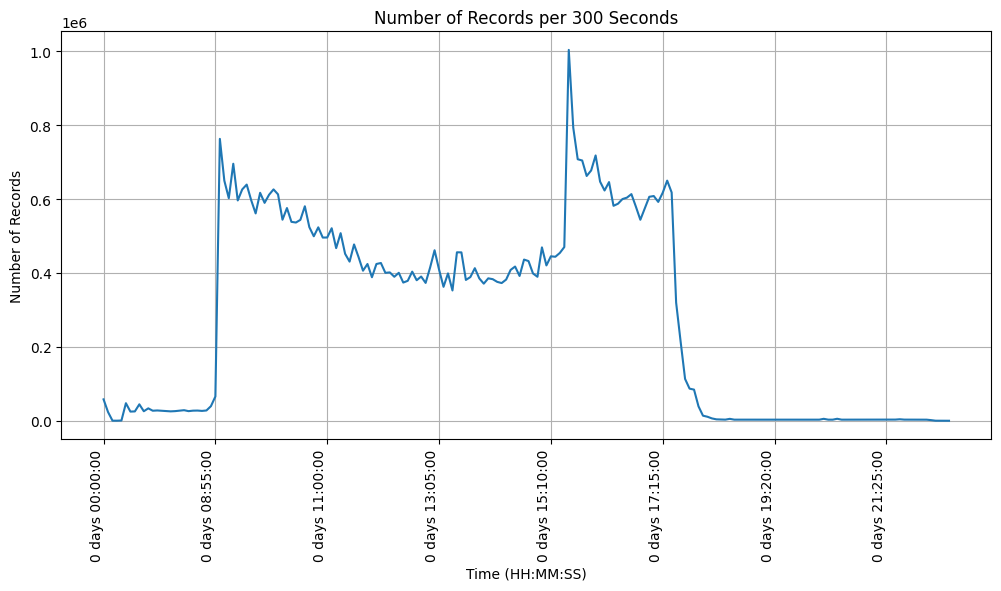

In [71]:
window_size = 300

# Use the floor function to create 10-second bins
df['time_bin'] = (df['time'].dt.total_seconds() // window_size) * window_size

# Step 2: Count the number of records per 10-second interval
record_counts = df.groupby('time_bin').size()

# Step 3: Convert time_bin (which is in total seconds) back to timedelta for plotting
record_counts.index = pd.to_timedelta(record_counts.index, unit='s')

# Step 4: Plot the results with the correct x-axis format
plt.figure(figsize=(12, 6))
record_counts.plot(kind='line')  # Line plot to visualize counts over time
plt.title(f'Number of Records per {window_size} Seconds')
plt.xlabel('Time (HH:MM:SS)')
plt.ylabel('Number of Records')
plt.grid(True)


plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:,.0f}'))

plt.show()

# Optionally, if you want to see the first few counts:
print(record_counts.head())
print(df.head(100))